# 生pythonで線形回帰(1つの特徴)

```
ある都市に出店するとどのくらい利益が出るのか
人口(x)から利益(y)を予測する
データセットはそれぞれ10000で割ったfloat。x/=10000 y/=10000
```

```
線形回帰はだたのn次関数
この例では1つの特徴(人口)を利用するので1次関数
人口のデータを元に利益の上昇関係を一次関数線を引いて
統計的に予測する
y = ax + b
```

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plot
from mpl_toolkits.mplot3d import Axes3D

### 教師データを可視化する

```
matplotlibを使ってXとyの可視化を行う関数
```

In [16]:
def plot_data(X, y):
    plot.plot(X, y, 'rx', markersize=10)
    plot.ylabel('Profit in $10,000s')
    plot.xlabel('Population of City in 10,000s')
    plot.show()

### 予測の悪さを計算する関数

```
X = 人口の1次元配列
y = 利益の1次元配列
thetaは y = aX + b のaとb
aとbはこのcompute_cost関数(予測の悪さを計算する関数)のフィードバックを受けて修正し
(学習するたびだんだんと)勝手に調整してくれる
```

In [17]:
def compute_cost(X, y, theta):
    m = y.size
    costs = (X.dot(theta) - y) ** 2
    return costs.sum() / (2.0 * m)

### cost関数のフィードバックを受けて1次関数のaとbを修正する関数

要は学習を行う関数。
いろいろあるが、この例は最急降下法(gradient descent)というアルゴリズムを利用

alphaは学習率
学習率は高いと学習速度が早いが、発散と呼ばれるいきなり全く的外れな予測しかしないようになる。
学習率は高いと学習速度が遅い

学習率のような自分で調整しないといけないパラメータをハイパーパラメータという

In [18]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = X.dot(theta)
        errors = h - y
        delta = X.T.dot(errors)
        theta -= (alpha / m) * delta
        J_history[i] = compute_cost(X, y, theta)
    return (theta, J_history)

In [19]:
# データのロード、変数の初期化
data1 = np.loadtxt('./assets/data1.txt', delimiter=',')
X = data1[:,0]
y = data1[:,1]
m = y.size
theta = np.zeros(2)

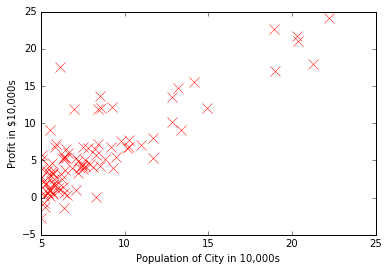

In [20]:
# トレーニングデータの可視化
plot_data(X, y)

In [21]:
# インターセプト項の挿入、ループ回数、学習率
X = np.vstack((np.ones(m), X)).T
iterations = 1500
alpha = 0.01

In [22]:
# 最急降下法の実行
(theta, J_history) = gradient_descent(X, y, theta, alpha, iterations)

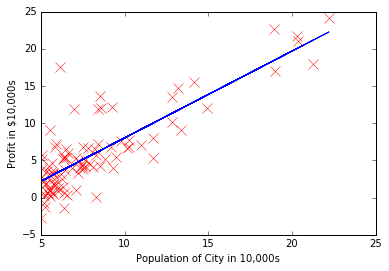

In [23]:
# 最急降下法の可視化
plot.plot(X[:,1], y, 'rx', markersize=10)
plot.ylabel('Profit in $10,000s')
plot.xlabel('Population of City in 10,000s')
plot.plot(X[:,1], X.dot(theta), '-')
plot.show()

In [24]:
# 予測値の出力
population = 3.5
predict = np.array([1, population]).dot(theta)
print("人口{population}人の都市で出店した場合の利益予測値は{predict}です。".format(population=population*10000, predict=predict*10000))
population = 7.0
predict = np.array([1, population]).dot(theta)
print("人口{population}人の都市で出店した場合の利益予測値は{predict}です。".format(population=population*10000, predict=predict*10000))

人口35000.0人の都市で出店した場合の利益予測値は4519.7678677017675です。
人口70000.0人の都市で出店した場合の利益予測値は45342.45012944714です。


In [25]:
# J(theta_0, theta_1)の可視化
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = compute_cost(X, y, t)
J_vals = J_vals.transpose()

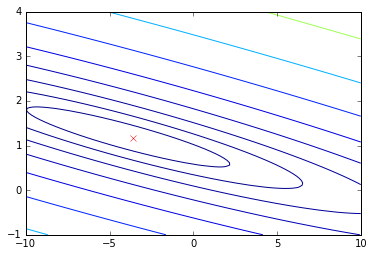

In [26]:
# 等高線図で最終的に降下した先の可視化
plot.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plot.plot(theta[0], theta[1], 'rx')
plot.show()

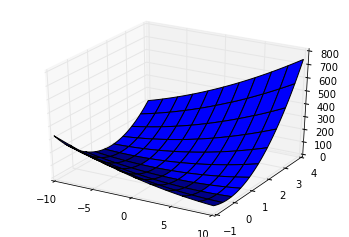

In [27]:
# 3Dグラフで降下する坂を可視化
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(t0, t1, J_vals)
plot.show()